<a href="https://colab.research.google.com/github/prashantRmishra/Tensorflow_learnings/blob/master/image_prediction_tensorFlow_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

a = tf.Variable(1, name="a")
b = tf.Variable(2, name="b")
f = a + b

init = tf.global_variables_initializer()
with tf.Session() as s:
    init.run()
    print( f.eval() )

3


In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

sess = tf.InteractiveSession()

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


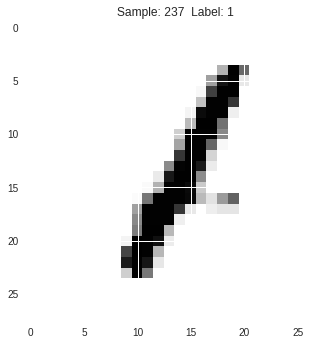

In [13]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(mnist.train.labels[num])  
    #Print the label converted back to a number
    label = mnist.train.labels[num].argmax(axis=0)
   # print(label)
    #Reshape the 768 values to a 28x28 image
    image = mnist.train.images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image)
    plt.show()
    
display_sample(237)

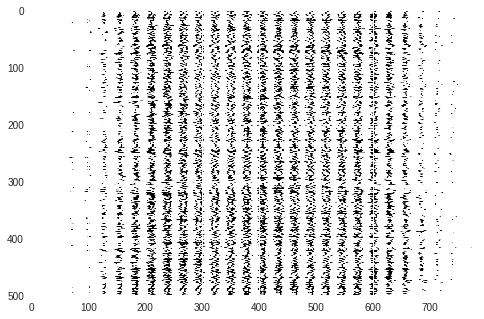

In [14]:
import numpy as np

images = mnist.train.images[0].reshape([1,784])
for i in range(1, 500):
    images = np.concatenate((images, mnist.train.images[i].reshape([1,784])))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

In [0]:
input_images = tf.placeholder(tf.float32, shape=[None, 784])
target_labels = tf.placeholder(tf.float32, shape=[None, 10])

In [0]:
hidden_nodes = 512

input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))

**bias**:Note: the term Bias is also used to refer to the systematic errors in a model, the tendency to keep getting the same results incorrectly. This tends to arise when a model is too simple, and so fails to represent the complexity of the underlying data, causing an algorithm to miss relevant relations between salient features and the expected outputs, despite having more than enough training data — a problem called underfitting. Something I explain here.
**weight:** In neuroscience and computer science, synaptic weight refers to the strength or amplitude of a connection between two nodes, corresponding in biology to the amount of influence the firing of one neuron has on another. The term is typically used in artificial and biological neural network research.

In [0]:
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases

In [19]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels=target_labels))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [0]:
correct_prediction = tf.equal(tf.argmax(digit_weights,1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [24]:
tf.global_variables_initializer().run()

for x in range(4000):
    batch = mnist.train.next_batch(200)
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]})
    if ((x+1) % 200 == 0):
        print("Training epoch " + str(x+1))
        print("Accuracy: " + str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels: mnist.test.labels})))

Training epoch 200
Accuracy: 0.8896
Training epoch 400
Accuracy: 0.9079
Training epoch 600
Accuracy: 0.9135
Training epoch 800
Accuracy: 0.9188
Training epoch 1000
Accuracy: 0.9247
Training epoch 1200
Accuracy: 0.9282
Training epoch 1400
Accuracy: 0.9298
Training epoch 1600
Accuracy: 0.9304
Training epoch 1800
Accuracy: 0.93
Training epoch 2000
Accuracy: 0.9323
Training epoch 2200
Accuracy: 0.9314
Training epoch 2400
Accuracy: 0.936
Training epoch 2600
Accuracy: 0.9338
Training epoch 2800
Accuracy: 0.9349
Training epoch 3000
Accuracy: 0.9373
Training epoch 3200
Accuracy: 0.9366
Training epoch 3400
Accuracy: 0.9372
Training epoch 3600
Accuracy: 0.9391
Training epoch 3800
Accuracy: 0.9377
Training epoch 4000
Accuracy: 0.9367


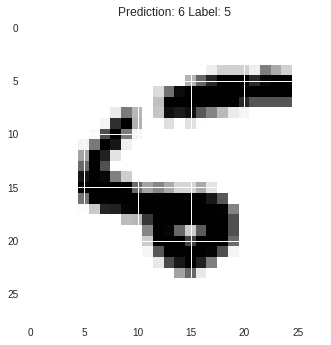

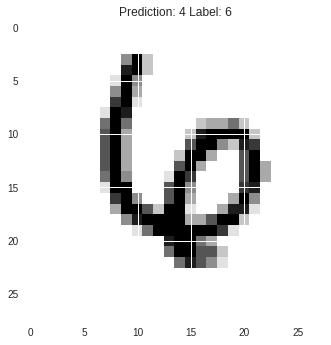

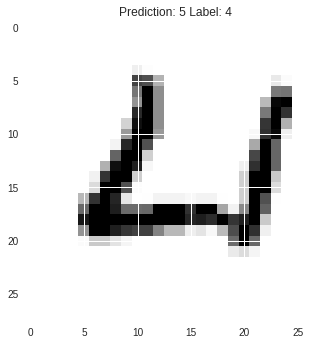

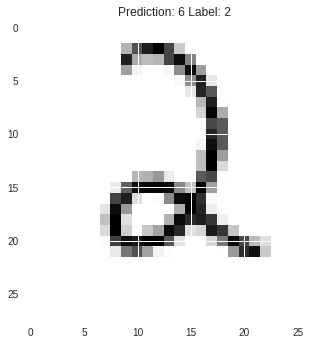

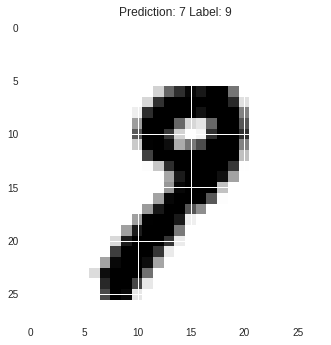

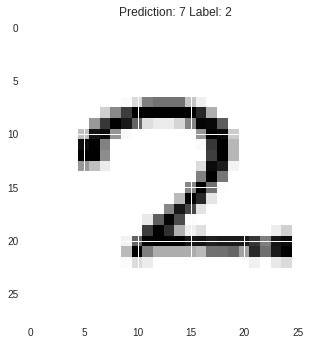

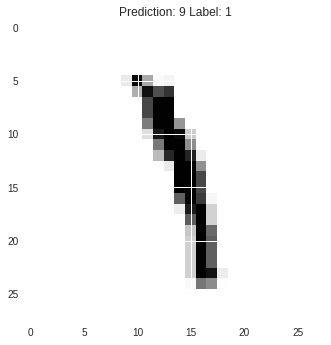

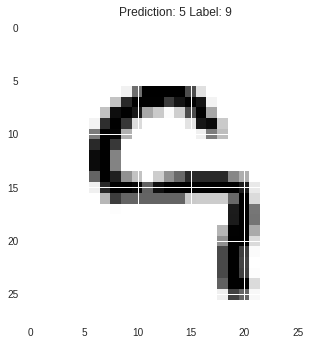

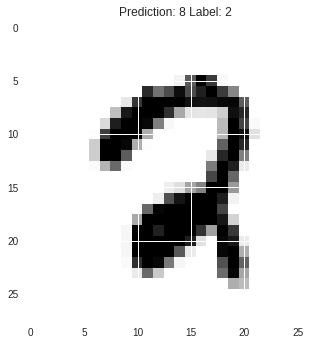

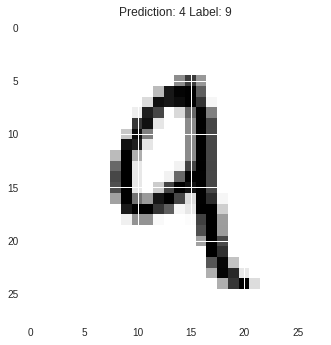

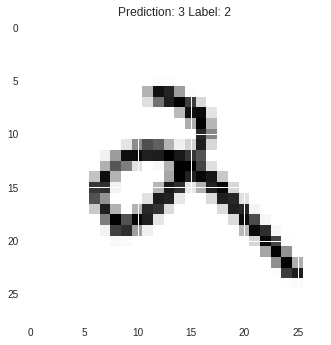

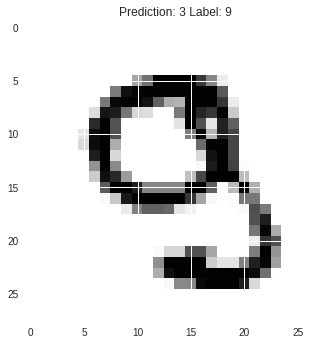

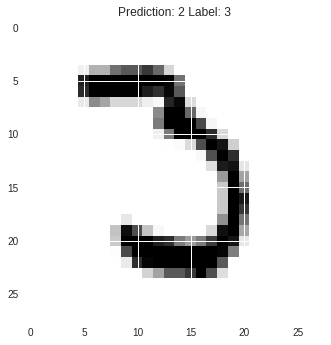

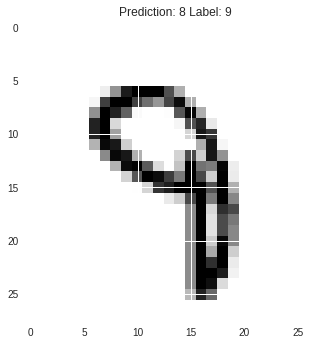

In [25]:
for x in range(200):
    # Load a single test image and its label
    x_train = mnist.test.images[x,:].reshape(1,784)
    y_train = mnist.test.labels[x,:]
    
    # Convert the one-hot label to an integer
    label = y_train.argmax()
    # Get the classification from our neural network's digit_weights final layer, and convert it to an integer
    prediction = sess.run(digit_weights, feed_dict={input_images: x_train}).argmax()
    # If the prediction does not match the correct label, display it
    if (prediction != label) :
        plt.title('Prediction: %d Label: %d' % (prediction, label))
        plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()